# EDA + Stats Mini Project

# Part - A (Concept Based)

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import scipy.stats as stats
from math import ceil
from statsmodels.stats.proportion import proportions_ztest

**The following are the BMI of 50 young adults:**

**17.5, 18.0, 36.8, 31.7, 31.7,**

**17.3, 24.3, 47.7, 38.5, 17.0,**

**23.7, 16.5, 25.1, 17.4, 18.0,**

**37.6, 19.7, 21.4, 28.6, 21.6,**

**19.3, 20.0, 16.9, 25.2, 19.8,**

**25.0, 17.2, 20.4, 20.1, 29.1,**

**19.1, 25.2, 23.2, 25.9, 24.0,**

**41.7, 24.0, 16.8, 26.8, 31.4,**

**16.9, 17.2, 24.1, 35.2, 19.1,**

**22.9, 18.2, 25.4, 35.4, 25.5**

**Use this data for answering following questions where relevant.**

**Q1. Compute the mean, median and the mode of the data.**

In [64]:
b=pd.Series([17.5,18.0,36.8,31.7,31.7,17.3,24.3,47.7,38.5,17.0,23.7,16.5,25.1,17.4,18.0,37.6,19.7,
             21.4,28.6,21.6,19.3,20.0,16.9,25.2,19.8,25.0,17.2,20.4,20.1,29.1,19.1,25.2,23.2,25.9,
             24.0,41.7,24.0,16.8,26.8,31.4,16.9,17.2,24.1,35.2,19.1,22.9,18.2,25.4,35.4,25.5])
print('Mean =',round(b.mean(),2),'\nMedian =',b.median(),'\nModes =',list(b.mode()))

Mean = 24.42 
Median = 23.45 
Modes = [16.9, 17.2, 18.0, 19.1, 24.0, 25.2, 31.7]


**Q2. Compute the range, variance and standard deviation of BMI.**

In [65]:
print('Range =',round(max(b)-min(b),2)) 
# calculates range by finding the difference between maximum value and minimum value
print('Variance =',round(b.var(),2))
print('Standard deviation =',round(b.std(),2))

Range = 31.2
Variance = 54.56
Standard deviation = 7.39


**Q3. Find the mean deviation for the data.**

In [66]:
sum(abs(b-b.mean()))/len(b) # uses the formula of mean deviation 

5.6424

**Q4. Calculate the Pearson's coefficient of skewness and comment on the skewness of the data.**

**[A measure to determine the skewness of a distribution is called the Pearson's coefficient of skewness. The value of the coefficient of skewness usually ranges from –3 to 3. When the distribution is symmetric, the coefficient is zero; when the distribution is positively skewed , the coefficient is positive, and when the distribution is negatively skewed the coefficient is negative.]**

In [67]:
3*(b.mean()-b.median())/b.std() # uses the formula of Peason's coefficient of skewness

# Observing the skewness value, we can say that the data is positively or right skewed.

0.394772251719685

**Q5. Count the number of data values that fall within one standard deviation of the mean. Compare this with the answer from Chebyshev’s Theorem.**

In [68]:
print('No. of values within one STD of mean =',len(b[(b>=b.mean()-b.std())&(b<=b.mean()+b.std())]))
# finds values greater than or equal to mean minus standard deviation and less than or equal to mean
# plus standard deviation and calculates the length of the resulting Series

# Since the Chebyshev's Theorem does not state the percentage of values within one standard deviation
# of the mean, we cannot use this count to compare it with the percentage from Chebyshev's Theorem.

No. of values within one STD of mean = 38


**Q6. Find the three quartiles and the interquartile range (IQR).**

In [69]:
q1=b.quantile(.25)
q2=b.median()
q3=b.quantile(.75)
iqr=q3-q1
print('First quartile =',q1,'\nSecond quartile =',q2,'\nThird quartile =',q3,'\nIQR =',round(iqr,2))

First quartile = 18.425 
Second quartile = 23.45 
Third quartile = 26.575 
IQR = 8.15


**Q7. Are there any outliers in the data set?**

In [70]:
b[(b<q1-1.5*iqr)|(b>q3+1.5*iqr)] # returns values below the lower whisker or above the upper whisker

# As we can observe, there are two outliers in the data.

7     47.7
35    41.7
dtype: float64

**Q8. Draw a boxplot of the dataset to confirm.**

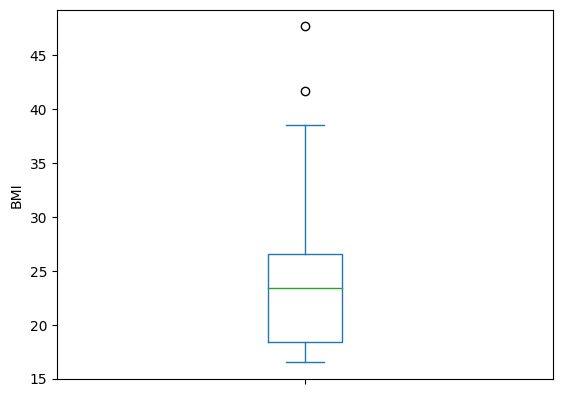

In [71]:
b.plot(kind='box',ylabel='BMI') # "ylabel = 'BMI'" sets 'BMI' as label of y-axis in the plot
plt.show()

**Q9. Find the percentile rank of the datapoint 25.0.**

In [72]:
r=pd.DataFrame({'BMI':b,'Rank':b.rank(ascending=False,pct=True)})
# rank() calculates percentile ranks of the values and then a DataFrame is created with the BMI values
# and their percentile ranks as columns
r[r.BMI==25] # returns record with BMI value 25

,BMI,Rank
25,25.0,0.4


**Q10. What is the probability that a young adult has a BMI above 25.0?**

In [73]:
len(b[b>25])/len(b) 
# calculates probability by dividing the number of adults with BMI > 25 by the total number of adults

0.38

**Q11. Create a frequency distribution for the data and visualize it appropriately.**

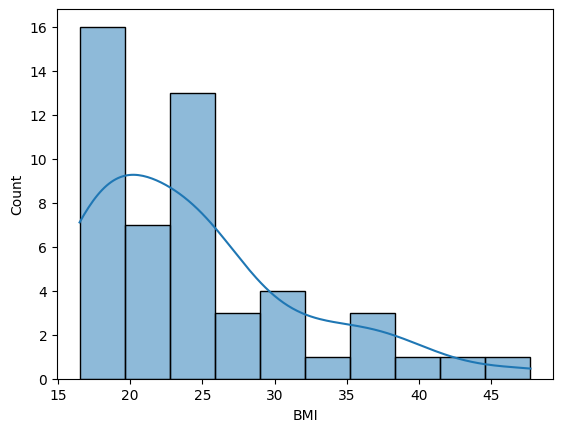

In [74]:
sns.histplot(x=b,bins=10,kde=True) 
# 'bins = 10' specifies 10 bins to be used for the histogram
# 'kde = True' adds Kernel Density Estimate (KDE) to the histogram
plt.xlabel('BMI')
plt.show()

**Q12. Create a probability distribution of the data and visualize it appropriately.**

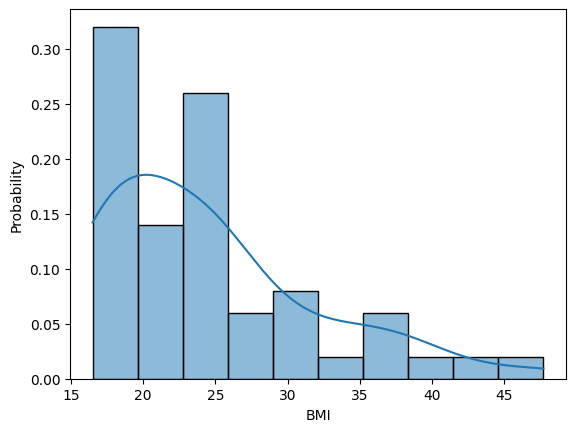

In [75]:
sns.histplot(x=b,bins=10,stat='probability',kde=True) 
# 'bins = 10' specifies 10 bins to be used for the histogram
# "stat = 'probability'" plots a probabilities of the values
# 'kde = True' adds Kernel Density Estimate (KDE) to the histogram
plt.xlabel('BMI')
plt.show()

**Q13. What is the shape of the distribution of this dataset? Create an
appropriate graph to determine that. Take 100 random samples with
replacement from this dataset of size 5 each. Create a sampling distribution of
the mean BMI of customers. Compare with other sampling distributions of
sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate
the Central Limit Theorem?**

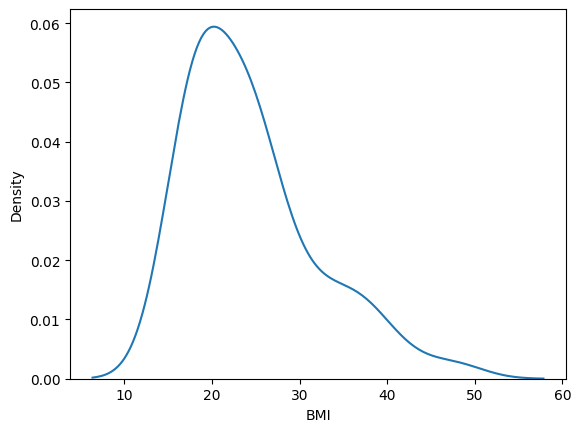

In [76]:
sns.kdeplot(x=b) # plots a Kernel Density Estimate (KDE) plot
plt.xlabel('BMI')
plt.show()

# We can observe from the Kernel Density Estimate (KDE) plot that the distribution of the data is 
# right skewed.

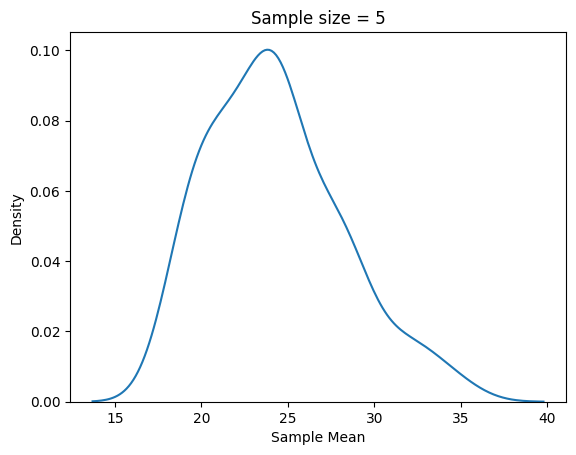

In [77]:
random.seed(1) # sets random seed = 1 for the selection of same random values
m=[np.mean(random.choices(b,k=5)) for i in range(100)]
# takes 100 samples of sample size 5 with replacement, calculates their means and stores into list m
sns.kdeplot(x=m) # plots a Kernel Density Estimate (KDE) plot
plt.xlabel('Sample Mean')
plt.title('Sample size = 5')
plt.show()

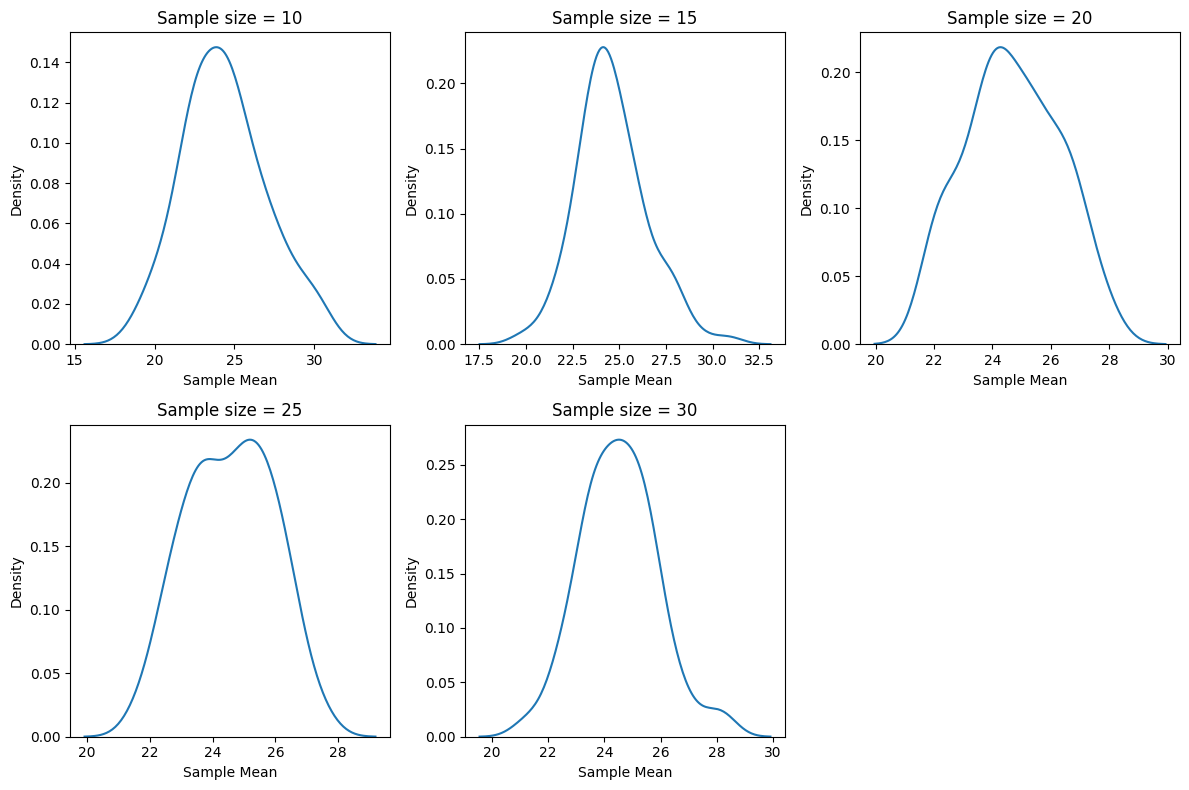

In [78]:
n=1
plt.figure(figsize=(12,8))
random.seed(1) # sets random seed = 1 for the selection of same random values
for i in range(10,31,5): # iterates i from 10 to 30 with a step size of 5
    m=[np.mean(random.choices(b,k=i)) for j in range(100)]
    # takes 100 samples of sample size i with replacement, calculates their means and stores into m
    plt.subplot(2,3,n) # adds and selects nth subplot within a figure with 2 rows and 3 columns 
    sns.kdeplot(x=m) # plots a Kernel Density Estimate (KDE) plot
    plt.xlabel('Sample Mean')
    plt.title('Sample size = '+str(i)) # sets title of subplot as 'Sample size = i'
    n+=1
plt.tight_layout() # adjusts spaces between subplots
plt.show()

# We can see that the sampling distributions with sample sizes 10 to 30 are less skewed than that with
# sample size 5. Also, the sampling distributions get less and less skewed as the sample size
# increases. This corroborates the Central Limit Theorem. 

**Q14. Treat this dataset as a binomial distribution where p is the probability
that a young adult has a BMI above 25.0. What is the probability that out of a
random sample of 10 young adults exactly 6 are having BMI greater than
25.0?**

In [79]:
stats.binom.pmf(6,10,0.38) # probability mass function for binomial distribution
# 0.38 is taken as the probability of a young adult having BMI above 25 as calculated in Q10

0.0934302761376788

**Q15. A study claims that 40% of all young adults have BMI greater than 25.0.
Using the Normal approximation of a Binomial distribution, find the probability
that in a random sample of 100 young adults exactly 50 of them will
have a BMI greater than 25.0.**

**[ Note that the normal distribution can be used to approximate a binomial
distribution if np>=5 and nq>=5 with the following correction for continuity
P(X=z) = P(z-0.5 < X < z+0.5 ) ]**

In [80]:
# np = 100 x 0.4 = 40 > 5
# nq = 100 x (1 - 0.4) = 60 > 5
# Thus, we can use normal approximation of the binomial distribution.

m=100*.4 # calculates mean using formula of mean of a binomial distribution
s=(100*.4*.6)**.5 
# calculates standard deviation using square root of formula of variance of a binomial distribution
stats.norm.cdf(50.5,m,s)-stats.norm.cdf(49.5,m,s) 
# cumulative distribution functions for normal distribution
# uses interval of 49.5 to 50.5 taking into account continuity correction of 0.5 on 50

0.01019538279050769

**Q16. Compute a 95% Confidence Interval for the true BMI of the population of
young adults using appropriate distribution. (State reasons as to why you
used a z or t distribution)**

In [81]:
list(np.round(stats.norm.interval(.95,loc=b.mean(),scale=b.std()/50**.5),2))
# returns confidence interval for normal distribution

# We used a z-distribution because n = 50 which is > 30.

[22.37, 26.47]

**Q17. A data scientist wants to estimate with 95% confidence the proportion of
young adults having BMI greater than 25.0. A recent study showed that 40%
of all young adults have BMI greater than 25.0. The data scientist wants to be
accurate within 2% of the true proportion. Find the minimum sample size
necessary.**

In [82]:
z=1.96 # critical value for 95% confidence
p=0.4
e=0.02
n=ceil(z**2*p*(1-p)/e**2) # uses formula for sample size and then rounds to next nearest integer
n

2305

**Q18. The same data scientist wants to estimate the true proportion of young
adults having BMI greater than 25.0. She wants to be 90% confident and
accurate within 5% of true proportion. Find the minimum sample size
necessary.**

In [83]:
z=1.64 # critical value for 90% confidence
p=0.4
e=0.05
n=ceil(z**2*p*(1-p)/e**2) # uses formula for sample size and then rounds to next nearest integer
n

259

**Q19. A researcher claims that currently 55% of all young adults have BMI
greater than 25 . Test his claim with an alpha = 0.05 if out of a random sample
of 30 CEOs only 20 are having BMI above 25.**

In [84]:
# H0: p = 0.55
# H1: p != 0.55

print('P-value =',proportions_ztest(20,30,.55)[1]) 
# performs One Proportion Z-test and returns p-value

# Since the p-value is more than the significance level, we fail to reject the null hypothesis. Hence,
# there is not enough evidence to conclude that the proportion of of all young adults having BMI
# greater than 25 is not equal to 55 %. Thus, 55% of all young adults have BMI greater than 25.

P-value = 0.17524424540000638


**Q20. A data scientist is researching the hypothesis that there is no difference
between BMI of public vs private schools students. So he collects data from the two
schools and finds that the proportion of public school students whose BMI is above
25.0 is 31.8 % vs Private school students is 38.7 %. Suppose the data scientist got
these values after interviewing 500 students of each school.**

a. What hypothesis would he use to compare the proportions of students having
BMI greater than 25.0 among both the schools?

In [85]:
# H0: Proportion of students with BMI greater than 25 is equal in public and private schools.
# H1: Proportion of students with BMI greater than 25 is not equal in public and private schools.

b. What are the critical values to be used?

In [86]:
# Significance level = 0.05

# The critical values to be used are -1.96 and 1.96.

c. What statistical test will be used to compare these proportions ?

In [87]:
# Two Proportion Z-test

d. Complete the test and obtain the P-value.

In [88]:
proportions_ztest([round(.318*500),round(.387*500)],[500,500])[1]
# performs Two Proportion Z-test and returns p-value
# calculates number of successes from percentages and then uses them to calculate p-value

0.02056118163236168

e. Summarize his conclusion based on the P-value.

In [89]:
# Since the p-value is less than the significance level, we reject the null hypothesis. Hence, there
# is enough evidence to conclude that the proportion of students with BMI greater than 25 is not equal
# in public and private schools. 

# Thus, there is difference of BMI between public and private school students.

-----

# Part - B (Dataset Based)

# EDA and Statistical Analysis of Fifa Case Study

## Data Preprocessing

**1. Import the necessary libraries and read the data.**

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
pd.options.display.max_columns=None # to display all the columns of a returned DataFrame

In [91]:
f=pd.read_csv('fifa.csv')
f.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,240331,P. Camará,21,https://cdn.sofifa.org/players/4/19/240331.png,Guinea Bissau,https://cdn.sofifa.org/flags/119.png,58,69,Crawley Town,https://cdn.sofifa.org/teams/2/light/110890.png,€220K,€1K,Right,1.0,3.0,2.0,High/ Medium,Lean,LS,28.0,"Jun 8, 2017",NaN,2019,6'1,161lbs,34.0,55.0,57.0,42.0,37.0,58.0,33.0,25.0,28.0,57.0,78.0,80.0,61.0,45.0,63.0,58.0,57.0,58.0,62.0,56.0,27.0,13.0,55.0,45.0,58.0,46.0,14.0,18.0,15.0,7.0,9.0,9.0,6.0,15.0,€429K
1,183465,J. Rodwell,27,https://cdn.sofifa.org/players/4/19/183465.png,England,https://cdn.sofifa.org/flags/14.png,68,68,Blackburn Rovers,https://cdn.sofifa.org/teams/2/light/3.png,€925K,€16K,Right,2.0,3.0,3.0,Medium/ Medium,Normal,CM,5.0,"Aug 23, 2018",NaN,2019,6'2,172lbs,67.0,63.0,74.0,71.0,64.0,64.0,66.0,47.0,67.0,71.0,60.0,61.0,69.0,60.0,62.0,72.0,76.0,51.0,71.0,70.0,70.0,68.0,67.0,70.0,57.0,69.0,66.0,69.0,64.0,9.0,10.0,15.0,11.0,12.0,€1.8M
2,205186,P. Gazzaniga,26,https://cdn.sofifa.org/players/4/19/205186.png,Argentina,https://cdn.sofifa.org/flags/52.png,74,78,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,€5M,€46K,Right,1.0,3.0,1.0,Medium/ Medium,Lean,GK,22.0,"Aug 23, 2017",NaN,2022,6'5,198lbs,21.0,12.0,14.0,32.0,8.0,20.0,33.0,21.0,49.0,20.0,63.0,65.0,64.0,59.0,49.0,49.0,66.0,45.0,67.0,19.0,32.0,16.0,13.0,52.0,41.0,55.0,23.0,20.0,11.0,76.0,73.0,84.0,72.0,76.0,€9.6M
3,233531,Y. Soteldo,21,https://cdn.sofifa.org/players/4/19/233531.png,Venezuela,https://cdn.sofifa.org/flags/61.png,71,81,Universidad de Chile,https://cdn.sofifa.org/teams/2/light/15029.png,€3.8M,€6K,Right,1.0,4.0,3.0,Medium/ Medium,Normal,CAM,10.0,"Jan 11, 2018",NaN,2018,5'3,121lbs,65.0,55.0,15.0,74.0,61.0,76.0,55.0,63.0,66.0,74.0,90.0,81.0,83.0,58.0,92.0,60.0,50.0,60.0,30.0,66.0,20.0,24.0,65.0,68.0,71.0,65.0,25.0,23.0,20.0,13.0,7.0,9.0,13.0,6.0,€6.1M
4,243718,R. Koot,18,https://cdn.sofifa.org/players/4/19/243718.png,Netherlands,https://cdn.sofifa.org/flags/34.png,56,68,Fortuna Sittard,https://cdn.sofifa.org/teams/2/light/634.png,€120K,€1K,Right,1.0,2.0,1.0,Medium/ Medium,Normal,GK,27.0,"Jul 1, 2016",NaN,2020,6'1,176lbs,11.0,6.0,13.0,19.0,9.0,12.0,10.0,10.0,18.0,14.0,30.0,19.0,25.0,48.0,44.0,17.0,64.0,20.0,45.0,5.0,25.0,11.0,4.0,30.0,15.0,39.0,11.0,14.0,12.0,59.0,55.0,59.0,55.0,56.0,€198K


**2. Drop any columns that you deem unnecessary for analysis.** 

**Hint: At least keep the following columns:**

**['ID','Name','Age','Nationality','Overall','Potential','Value','Wage','Joined','Preferred Foot','Contract Valid Until', 'Height', 'Weight', 'Penalties', 'Release Clause',’ International Reputation’, ‘Position’]**

In [92]:
f=f.drop(['Photo','Flag','Club','Club Logo','Jersey Number','Loaned From'],axis=1)
# The columns dropped above do not provide information on the performance of a player and thus are
# unnecessary for our case study.
f.head()

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,240331,P. Camará,21,Guinea Bissau,58,69,€220K,€1K,Right,1.0,3.0,2.0,High/ Medium,Lean,LS,"Jun 8, 2017",2019,6'1,161lbs,34.0,55.0,57.0,42.0,37.0,58.0,33.0,25.0,28.0,57.0,78.0,80.0,61.0,45.0,63.0,58.0,57.0,58.0,62.0,56.0,27.0,13.0,55.0,45.0,58.0,46.0,14.0,18.0,15.0,7.0,9.0,9.0,6.0,15.0,€429K
1,183465,J. Rodwell,27,England,68,68,€925K,€16K,Right,2.0,3.0,3.0,Medium/ Medium,Normal,CM,"Aug 23, 2018",2019,6'2,172lbs,67.0,63.0,74.0,71.0,64.0,64.0,66.0,47.0,67.0,71.0,60.0,61.0,69.0,60.0,62.0,72.0,76.0,51.0,71.0,70.0,70.0,68.0,67.0,70.0,57.0,69.0,66.0,69.0,64.0,9.0,10.0,15.0,11.0,12.0,€1.8M
2,205186,P. Gazzaniga,26,Argentina,74,78,€5M,€46K,Right,1.0,3.0,1.0,Medium/ Medium,Lean,GK,"Aug 23, 2017",2022,6'5,198lbs,21.0,12.0,14.0,32.0,8.0,20.0,33.0,21.0,49.0,20.0,63.0,65.0,64.0,59.0,49.0,49.0,66.0,45.0,67.0,19.0,32.0,16.0,13.0,52.0,41.0,55.0,23.0,20.0,11.0,76.0,73.0,84.0,72.0,76.0,€9.6M
3,233531,Y. Soteldo,21,Venezuela,71,81,€3.8M,€6K,Right,1.0,4.0,3.0,Medium/ Medium,Normal,CAM,"Jan 11, 2018",2018,5'3,121lbs,65.0,55.0,15.0,74.0,61.0,76.0,55.0,63.0,66.0,74.0,90.0,81.0,83.0,58.0,92.0,60.0,50.0,60.0,30.0,66.0,20.0,24.0,65.0,68.0,71.0,65.0,25.0,23.0,20.0,13.0,7.0,9.0,13.0,6.0,€6.1M
4,243718,R. Koot,18,Netherlands,56,68,€120K,€1K,Right,1.0,2.0,1.0,Medium/ Medium,Normal,GK,"Jul 1, 2016",2020,6'1,176lbs,11.0,6.0,13.0,19.0,9.0,12.0,10.0,10.0,18.0,14.0,30.0,19.0,25.0,48.0,44.0,17.0,64.0,20.0,45.0,5.0,25.0,11.0,4.0,30.0,15.0,39.0,11.0,14.0,12.0,59.0,55.0,59.0,55.0,56.0,€198K


**3. The following columns need to be converted for further analysis:**

**'Value', 'Wage', 'Joined', 'Contract Valid Until', 'Height', 'Weight', 'Release Clause'**

**(You might encounter Nan values in the above columns. Pandas treat Nan values as a float. Please keep that in mind when making the conversions.)**

In [93]:
def convert(x): # function for conversion of values having '€' as prefix and 'K' or 'M' as suffix
    if pd.isna(x):
        return x # returns value as is if it is null
    elif x[-1]=='K':
        return float(x[1:-1])*1000
    elif x[-1]=='M':
        return float(x[1:-1])*1000000
    else:
        return float(x[1:])
f.Value=f.Value.apply(convert)
f.Wage=f.Wage.apply(convert)
f.Joined=f.Joined.apply(lambda x: x if pd.isna(x) else int(x[-4:])) 
# integer conversion of last four characters to extract the years of joining
f['Contract Valid Until']=pd.to_datetime(f['Contract Valid Until'].apply(lambda x: str(x)[-4:]))
# datetime conversion of last four characters to extract the years of contract end
h=f.Height.str.split("'",expand=True) # splits height into foot height and inch height
f.Height=round(h[0].astype(float)+h[1].astype(float)/12,2) 
# converts inch height into foot and adds to foot height
f.Weight=f.Weight.apply(lambda x: x if pd.isna(x) else float(x[:-3]))
# extracts everything before last 3 characters to remove 'lbs' suffix
f['Release Clause']=f['Release Clause'].apply(convert)
f.head()

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,240331,P. Camará,21,Guinea Bissau,58,69,220000.0,1000.0,Right,1.0,3.0,2.0,High/ Medium,Lean,LS,2017.0,2019-01-01,6.08,161.0,34.0,55.0,57.0,42.0,37.0,58.0,33.0,25.0,28.0,57.0,78.0,80.0,61.0,45.0,63.0,58.0,57.0,58.0,62.0,56.0,27.0,13.0,55.0,45.0,58.0,46.0,14.0,18.0,15.0,7.0,9.0,9.0,6.0,15.0,429000.0
1,183465,J. Rodwell,27,England,68,68,925000.0,16000.0,Right,2.0,3.0,3.0,Medium/ Medium,Normal,CM,2018.0,2019-01-01,6.17,172.0,67.0,63.0,74.0,71.0,64.0,64.0,66.0,47.0,67.0,71.0,60.0,61.0,69.0,60.0,62.0,72.0,76.0,51.0,71.0,70.0,70.0,68.0,67.0,70.0,57.0,69.0,66.0,69.0,64.0,9.0,10.0,15.0,11.0,12.0,1800000.0
2,205186,P. Gazzaniga,26,Argentina,74,78,5000000.0,46000.0,Right,1.0,3.0,1.0,Medium/ Medium,Lean,GK,2017.0,2022-01-01,6.42,198.0,21.0,12.0,14.0,32.0,8.0,20.0,33.0,21.0,49.0,20.0,63.0,65.0,64.0,59.0,49.0,49.0,66.0,45.0,67.0,19.0,32.0,16.0,13.0,52.0,41.0,55.0,23.0,20.0,11.0,76.0,73.0,84.0,72.0,76.0,9600000.0
3,233531,Y. Soteldo,21,Venezuela,71,81,3800000.0,6000.0,Right,1.0,4.0,3.0,Medium/ Medium,Normal,CAM,2018.0,2018-01-01,5.25,121.0,65.0,55.0,15.0,74.0,61.0,76.0,55.0,63.0,66.0,74.0,90.0,81.0,83.0,58.0,92.0,60.0,50.0,60.0,30.0,66.0,20.0,24.0,65.0,68.0,71.0,65.0,25.0,23.0,20.0,13.0,7.0,9.0,13.0,6.0,6100000.0
4,243718,R. Koot,18,Netherlands,56,68,120000.0,1000.0,Right,1.0,2.0,1.0,Medium/ Medium,Normal,GK,2016.0,2020-01-01,6.08,176.0,11.0,6.0,13.0,19.0,9.0,12.0,10.0,10.0,18.0,14.0,30.0,19.0,25.0,48.0,44.0,17.0,64.0,20.0,45.0,5.0,25.0,11.0,4.0,30.0,15.0,39.0,11.0,14.0,12.0,59.0,55.0,59.0,55.0,56.0,198000.0


**4. Check the duplicate records and do appropriate treatments.**

In [94]:
f[f.duplicated()]

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
152,211732,T. Thiele,26,Germany,67,68,900000.0,3000.0,Right,1.0,3.0,2.0,High/ Medium,Normal,LS,2018.0,2021-01-01,6.17,185.0,54.0,62.0,59.0,61.0,70.0,64.0,61.0,32.0,40.0,62.0,72.0,85.0,63.0,64.0,59.0,69.0,53.0,75.0,76.0,57.0,30.0,20.0,67.0,47.0,63.0,68.0,18.0,16.0,17.0,15.0,8.0,15.0,13.0,11.0,1400000.0
290,227708,Lucas Tagliapietra,27,Brazil,69,71,1000000.0,7000.0,Left,1.0,3.0,2.0,Medium/ Medium,Normal,LCB,2018.0,2019-01-01,6.33,207.0,28.0,23.0,72.0,61.0,28.0,42.0,27.0,26.0,44.0,50.0,49.0,53.0,31.0,62.0,35.0,38.0,56.0,68.0,90.0,21.0,76.0,71.0,24.0,32.0,36.0,65.0,58.0,71.0,66.0,10.0,11.0,9.0,12.0,6.0,1800000.0
321,240584,B. Verbong,18,Netherlands,58,70,160000.0,1000.0,Right,1.0,2.0,1.0,Medium/ Medium,Normal,GK,2016.0,2019-01-01,6.08,176.0,14.0,5.0,10.0,20.0,9.0,6.0,11.0,12.0,25.0,12.0,28.0,24.0,37.0,53.0,41.0,17.0,64.0,16.0,49.0,5.0,23.0,9.0,4.0,36.0,17.0,42.0,13.0,14.0,12.0,61.0,59.0,60.0,52.0,58.0,264000.0
373,231823,J. Hoogma,20,Netherlands,69,80,1600000.0,10000.0,Left,1.0,3.0,2.0,Medium/ Medium,Lean,CB,2017.0,2021-01-01,6.25,179.0,28.0,23.0,58.0,69.0,30.0,45.0,37.0,33.0,71.0,70.0,67.0,65.0,63.0,68.0,60.0,47.0,54.0,67.0,76.0,24.0,68.0,71.0,32.0,34.0,35.0,63.0,67.0,72.0,69.0,11.0,13.0,14.0,7.0,9.0,3000000.0
378,238160,M. Demiral,20,Turkey,73,83,5500000.0,7000.0,Left,1.0,3.0,2.0,Medium/ Medium,Lean,RCB,NaN,2019-01-01,6.33,187.0,31.0,32.0,68.0,62.0,34.0,51.0,48.0,23.0,61.0,53.0,56.0,65.0,61.0,63.0,56.0,60.0,68.0,69.0,82.0,38.0,71.0,77.0,26.0,38.0,41.0,61.0,74.0,77.0,73.0,15.0,7.0,13.0,6.0,11.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25484,201401,Campabadal,25,Spain,68,73,975000.0,4000.0,Right,1.0,3.0,2.0,Medium/ Medium,Normal,RB,2017.0,2019-01-01,6.00,170.0,66.0,21.0,58.0,60.0,27.0,54.0,47.0,45.0,52.0,63.0,70.0,70.0,72.0,63.0,69.0,50.0,72.0,67.0,67.0,63.0,68.0,70.0,22.0,37.0,48.0,58.0,65.0,70.0,73.0,15.0,7.0,12.0,10.0,14.0,1600000.0
25485,207559,S. Tibbling,23,Sweden,73,79,5500000.0,19000.0,Right,1.0,3.0,3.0,High/ High,Normal,LCM,2017.0,2022-01-01,5.75,163.0,67.0,54.0,58.0,75.0,44.0,75.0,65.0,41.0,72.0,76.0,78.0,72.0,80.0,73.0,82.0,59.0,39.0,84.0,68.0,55.0,60.0,68.0,62.0,72.0,52.0,73.0,62.0,63.0,51.0,13.0,15.0,12.0,9.0,14.0,8300000.0
25486,205157,Ruiz de Galarreta,24,Spain,70,75,2300000.0,6000.0,Right,1.0,3.0,3.0,Medium/ Medium,Lean,RCM,2018.0,2022-01-01,5.75,152.0,53.0,56.0,51.0,75.0,61.0,66.0,58.0,45.0,72.0,72.0,62.0,65.0,75.0,65.0,78.0,62.0,48.0,70.0,58.0,63.0,70.0,64.0,58.0,73.0,47.0,62.0,66.0,69.0,65.0,12.0,6.0,13.0,7.0,12.0,3900000.0
25487,188802,M. Schmelzer,30,Germany,77,77,6500000.0,43000.0,Left,2.0,2.0,2.0,High/ High,Normal,LB,2008.0,2021-01-01,5.92,163.0,73.0,37.0,68.0,74.0,47.0,63.0,73.0,67.0,63.0,69.0,74.0,78.0,65.0,77.0,63.0,74.0,75.0,82.0,75.0,60.0,81.0,78.0,54.0,52.0,46.0,72.0,75.0,78.0,80.0,14.0,10.0,15.0,9.0,8.0,11100000.0


In [95]:
f=f.drop_duplicates()
f.duplicated().sum() # returns number of duplicate records

0

**5. Check the variation of the features. If you are performing variance and standard deviation, kindly explain why the variances of the variables are higher than the standard deviation. Also, explain which one tells the exact variation of the features. Based on this analysis decide which feature is not needed.**

In [96]:
for i in f.select_dtypes('number').drop('ID',axis=1).columns: # names of numerical columns except 'ID'
    print('Variance of',i,'=',round(f[i].var(),2))
    print('SD of',i,'=',round(f[i].std(),2),'\n')
    
# The variances of many variables are higher than the standard deviations because standard deviation
# is the square root of variance.
        # Standard deviation is expressed in the same units as the data and thus, it tells the exact
# variation of the variables.
        # Since all of the features have a variance greater than zero, we can say that there is no
# such feature which is not needed.

Variance of Age = 21.58
SD of Age = 4.64 

Variance of Overall = 47.64
SD of Overall = 6.9 

Variance of Potential = 37.39
SD of Potential = 6.11 

Variance of Value = 30756103009054.01
SD of Value = 5545818.52 

Variance of Wage = 478746806.1
SD of Wage = 21880.28 

Variance of International Reputation = 0.15
SD of International Reputation = 0.39 

Variance of Weak Foot = 0.44
SD of Weak Foot = 0.66 

Variance of Skill Moves = 0.58
SD of Skill Moves = 0.76 

Variance of Joined = 4.49
SD of Joined = 2.12 

Variance of Height = 0.05
SD of Height = 0.22 

Variance of Weight = 243.22
SD of Weight = 15.6 

Variance of Crossing = 338.17
SD of Crossing = 18.39 

Variance of Finishing = 380.45
SD of Finishing = 19.51 

Variance of HeadingAccuracy = 301.8
SD of HeadingAccuracy = 17.37 

Variance of ShortPassing = 216.22
SD of ShortPassing = 14.7 

Variance of Volleys = 313.77
SD of Volleys = 17.71 

Variance of Dribbling = 359.27
SD of Dribbling = 18.95 

Variance of Curve = 339.78
SD of Curve

**6. Check for missing values and do imputations where necessary.**

**Note: Do the appropriate imputation based on the distribution.**

**Hints: Few analyses are listed below to decide which imputation method to perform.**
1. Skewness level verification
2. Kurtosis level measurement identification. Explain what the Skewness and Kurtosis depicted.
3. Distribution plots like KDE, Distribution plot, Box plot, etc.

In [97]:
pd.DataFrame([f.isna().sum(),round(f.isna().sum()/len(f)*100,2)],index=['Number','Percentage']).T
# returns number and percentage of missing values in tabular format

# We observe that most of the columns have missing values ranging from 36 to the highest of 1171 in
# the 'Release Clause' column.

,Number,Percentage
ID,0.0,0.00
Name,0.0,0.00
Age,0.0,0.00
Nationality,0.0,0.00
Overall,0.0,0.00
Potential,0.0,0.00
Value,0.0,0.00
Wage,0.0,0.00
Preferred Foot,36.0,0.26
International Reputation,36.0,0.26


In [98]:
# Since 'Contract Valid Until' has only 1.62 % missing values, we can drop all records with a null
# value in 'Contract Valid Until' column.

f=f[f['Contract Valid Until'].notna()] 
# stores all records with a non-null value in 'Contract Valid Until' column into f
f.isna().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Value                         0
Wage                          0
Preferred Foot                0
International Reputation      0
Weak Foot                     0
Skill Moves                   0
Work Rate                     0
Body Type                     0
Position                      0
Joined                      943
Contract Valid Until          0
Height                        0
Weight                        0
Crossing                      0
Finishing                     0
HeadingAccuracy               0
ShortPassing                  0
Volleys                       0
Dribbling                     0
Curve                         0
FKAccuracy                    0
LongPassing                   0
BallControl                   0
Acceleration                  0
SprintSpeed                   0
Agility 

In [99]:
pd.DataFrame([f[['Joined','Release Clause']].skew(),f[['Joined','Release Clause']].kurt()],
             index=['Skewness','Kurtosis']) # returns skewness and kurtosis in tabular format

# By looking at the skewness values, we can say that the distribution of 'Joined' is highly left
# skewed while that of 'Release Clause' is highly right skewed.
        # Kurtosis values tell us that the distributions of both 'Joined' and 'Release Clause' are
# highly leptokurtic.

,Joined,Release Clause
Skewness,-2.606695,7.156441
Kurtosis,10.906320,78.236360


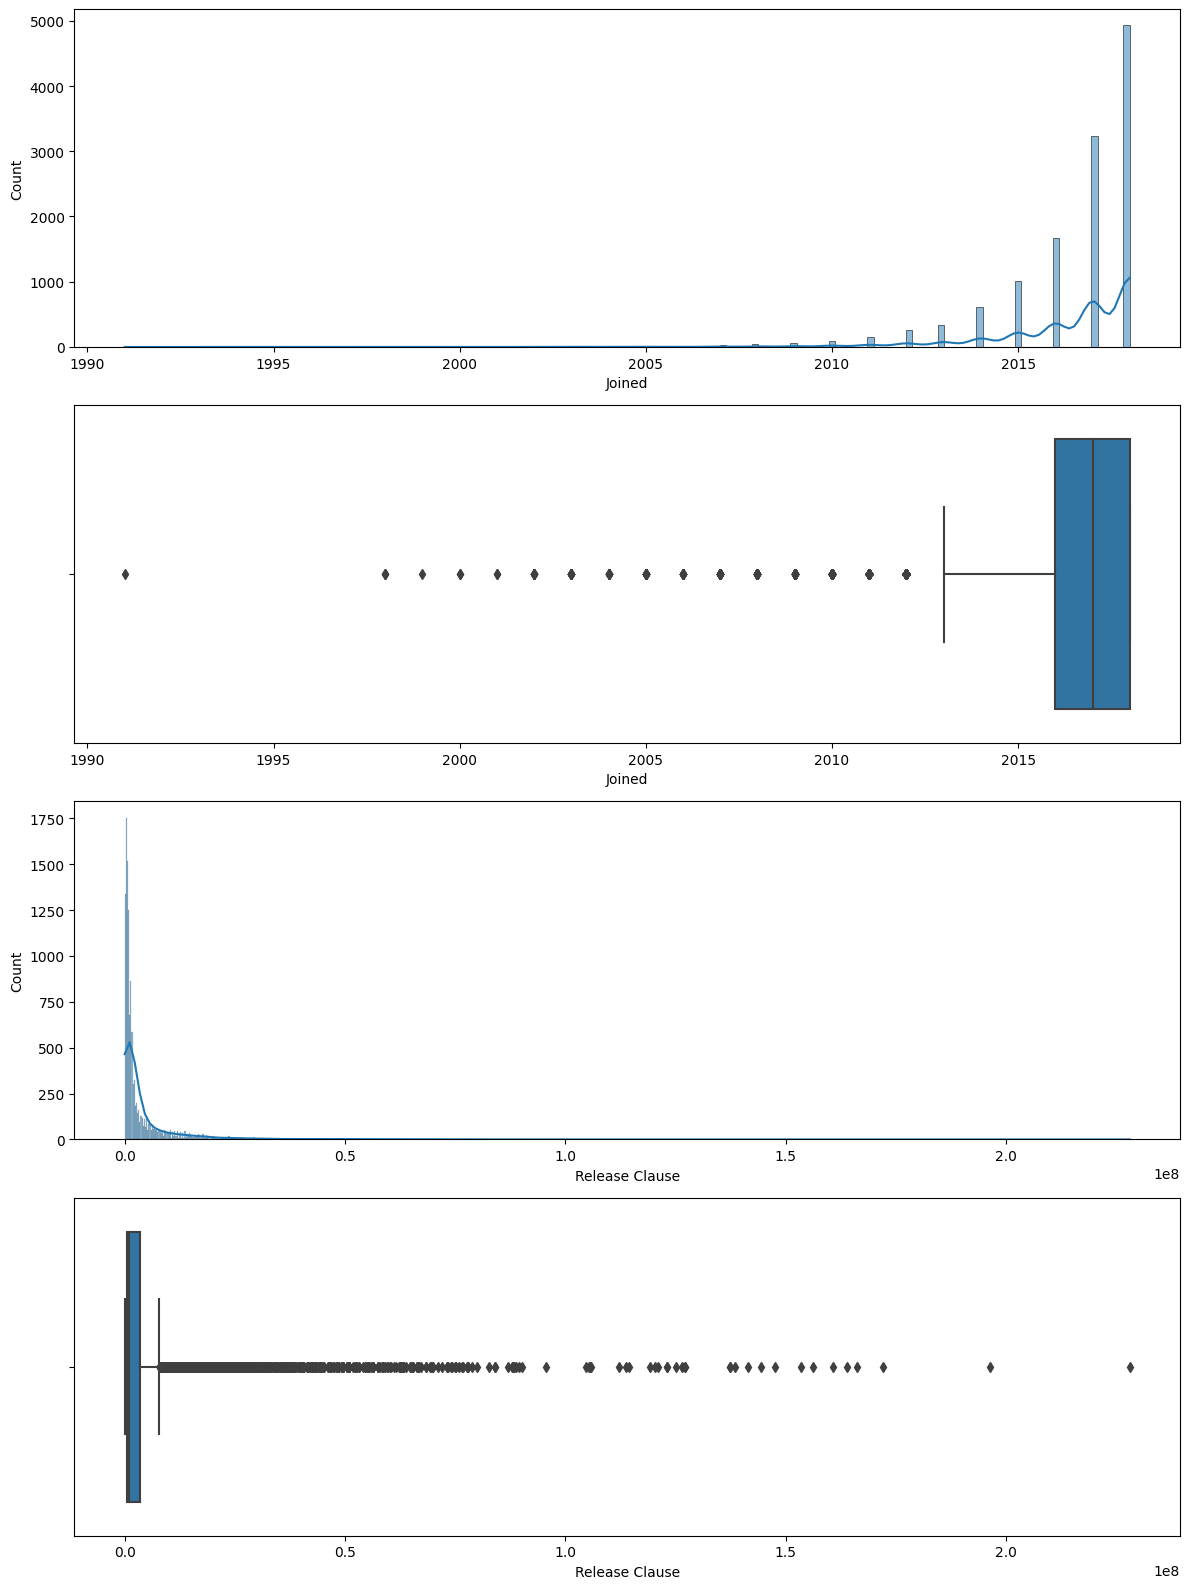

In [100]:
n=1
plt.figure(figsize=(12,16))
for i in ['Joined','Release Clause']:
    plt.subplot(4,1,n) # adds and selects nth subplot within a figure with 4 rows and 1 column
    sns.histplot(x=f[i],kde=True) # 'kde = True' shows Kernel Density Estimate (KDE) in the histogram
    plt.subplot(4,1,n+1)
    sns.boxplot(x=f[i])
    n+=2
plt.tight_layout() # adjusts spaces between subplots
plt.show()

# We observe that most of the players have joined from 2013 with the highest number of players joining
# in 2018. Number of new players has increased over the years.
# The median year of joining is 2017. The earliest player has joined in 1991.
# Most of the players have release clause below 25,000,000. The highest release clause is more than 
# 225,000,000.

In [101]:
# Since 'Joined' is a categorical column, we shall impute its missing values with its mode. Also,
# 'Release Clause' column has a lot of outliers as observed from the box plot and thus, we shall
# impute its missing values with its median.

f.Joined=f.Joined.fillna(f.Joined.mode()[0]) # imputes missing values in 'Joined' column with its mode
f['Release Clause'].fillna(f['Release Clause'].median(),inplace=True)
# imputes missing values in 'Release Clause' column with its median in place
f.isna().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance   

**7. Find out If there is any player above 2.0 * IQR – Q1 and below 2.0 * IQR + Q3. What would happen if the data has above or below the mentioned values and display the names of the players?**

In [105]:
n=f.select_dtypes('number') # stores all numerical columns into n
q1=n.quantile(.25)
q3=n.quantile(.75)
iqr=q3-q1
pd.Series(f.Name[((n>2*iqr-q1)&(n<2*iqr+q3)).any(axis=1)].unique())
# returns names of players for whom data in atleast one column is above 2.0 * IQR – Q1 and below
# 2.0 * IQR + Q3 as a Series

# We can observe that there are indeed such players. This tells us that the data for these players has
# atleast one non-outlier or a value which follows the normal trend in its column.

0           P. Camará
1          J. Rodwell
2        P. Gazzaniga
3          Y. Soteldo
4             R. Koot
             ...     
12838        M. Etuin
12839      D. Dalling
12840        K. Keleş
12841     H. Miyazawa
12842          T. Lam
Length: 12843, dtype: object

**8. Check the Categorical variables and find if there is any data imbalance in any column also find if any cardinality problem exists.**

In [42]:
f['Body Type'].value_counts()

Normal                 7826
Lean                   4769
Stocky                  835
Shaqiri                   1
C. Ronaldo                1
Neymar                    1
PLAYER_BODY_TYPE_25       1
Akinfenwa                 1
Courtois                  1
Name: Body Type, dtype: int64

In [43]:
# We observe that there are some garbage values in the 'Body Type' column. Thus, we shall drop such
# records from the data.

f=f[(f['Body Type']=='Normal')|(f['Body Type']=='Lean')|(f['Body Type']=='Stocky')]
# stores data with only valid values of 'Body Type' column into f
f['Body Type'].value_counts()

Normal    7826
Lean      4769
Stocky     835
Name: Body Type, dtype: int64

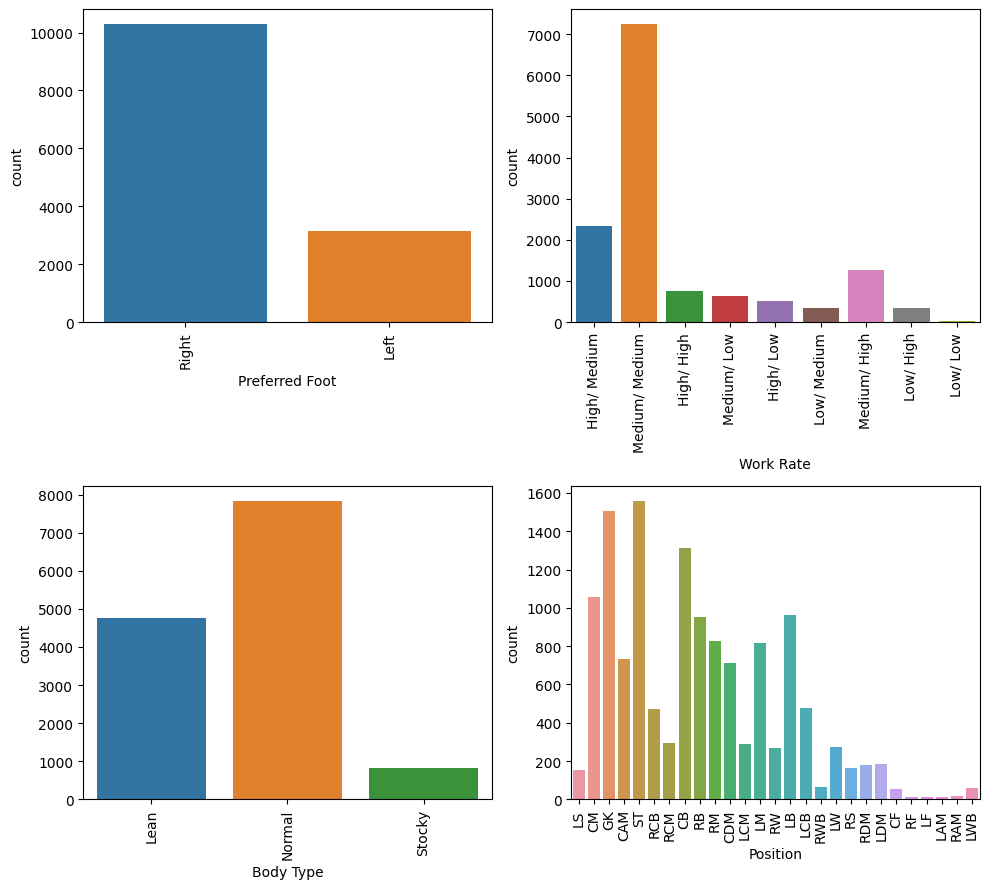

In [44]:
n=1
plt.figure(figsize=(10,9))
for i in ['Preferred Foot','Work Rate','Body Type','Position']:
    plt.subplot(2,2,n) # adds and selects nth subplot within a figure with 2 rows and 2 columns
    sns.countplot(x=f[i])
    plt.xticks(rotation=90) # rotates X-axis ticks by 90 degrees
    n+=1
plt.tight_layout()
plt.show()

# We can observe that 'Preferred Foot' and 'Work Rate' are highly imbalanced.

# We see that most of the players prefer their right foot. 
# Most of the players have a work rate of 'Medium/ Medium' or 'High/ Medium'. Least number of players
# have a work rate of 'Low/ Low'.
# Most of the players have a normal or lean body.
# Most of the players have 'ST' position.

In [45]:
f.nunique()

# We can see that 'ID' and 'Name' have a lot of unique values, which tells us that cardinality is
# high for these variables. Thus, cardinality problems exist.

ID                          13430
Name                        12837
Age                            29
Nationality                   159
Overall                        46
Potential                      47
Value                         202
Wage                          136
Preferred Foot                  2
International Reputation        5
Weak Foot                       5
Skill Moves                     5
Work Rate                       9
Body Type                       3
Position                       27
Joined                         22
Contract Valid Until            9
Height                         21
Weight                         55
Crossing                       89
Finishing                      92
HeadingAccuracy                91
ShortPassing                   85
Volleys                        87
Dribbling                      92
Curve                          88
FKAccuracy                     86
LongPassing                    83
BallControl                    89
Acceleration  

**9. Generate pair plots for the following variables:**

**Overall, Value, Wage, International Reputation, Height, Weight, Release Clause**

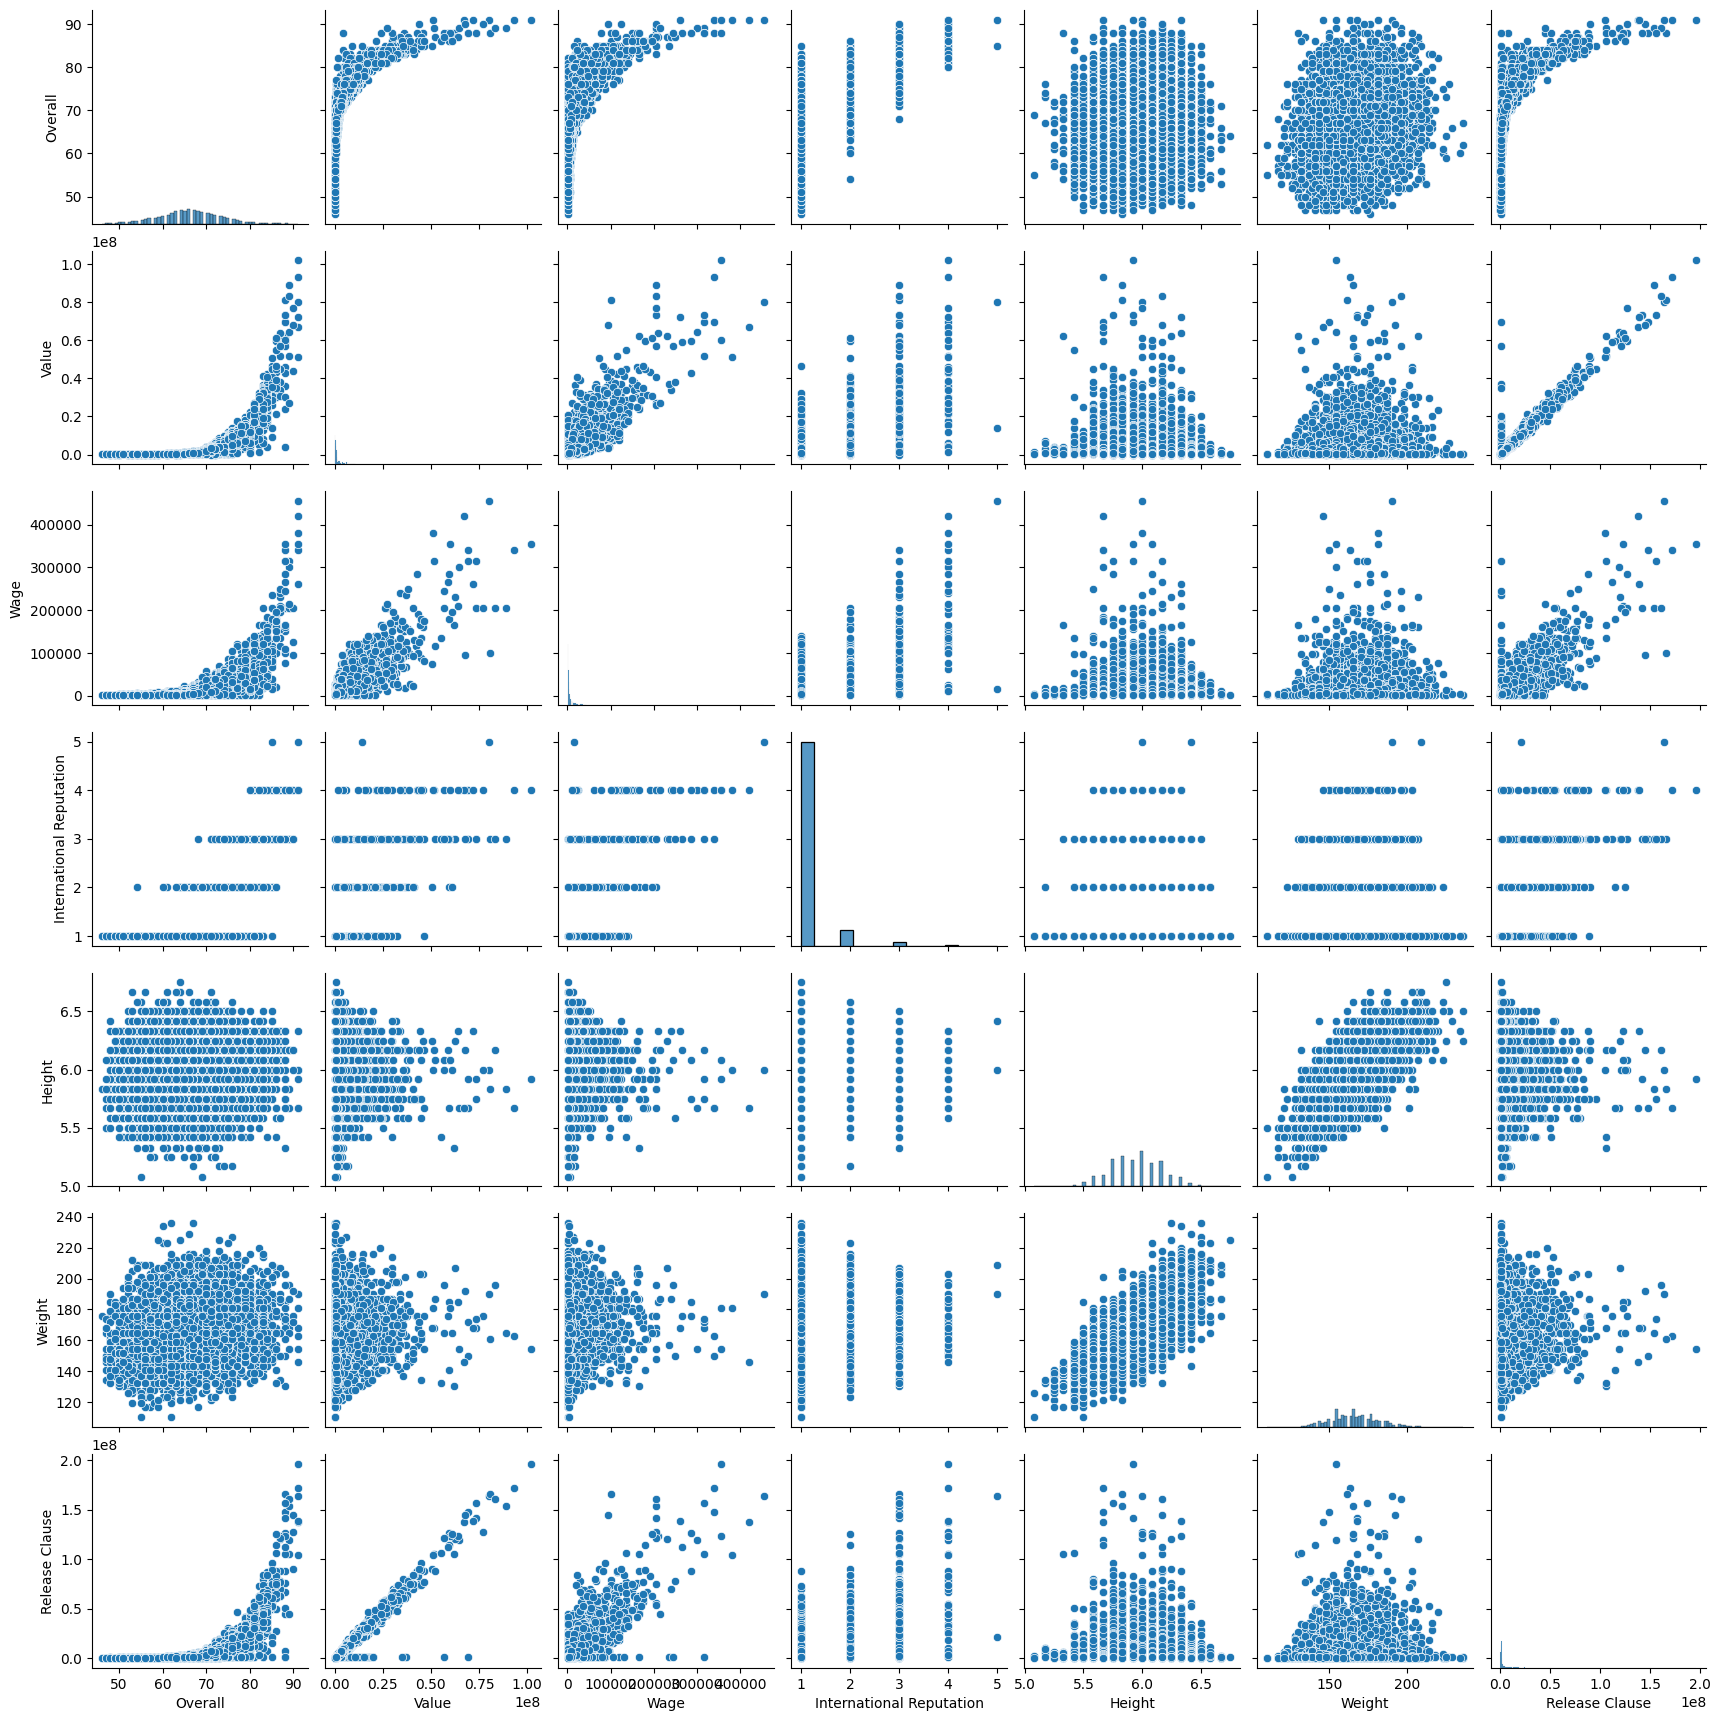

In [46]:
sns.pairplot(f[['Overall','Value','Wage','International Reputation','Height','Weight',
                'Release Clause']])
plt.show()

# We observe that the overall score of players is approximately normally distributed.
# The value, wage, international reputation and release clause of a player are positively correlated
# with the overall score of a player.
# The distribution of international reputation is highly positively skewed.
# The height of players is approximately normally distributed.
# The weight and height of a player are highly positively correlated.

**10. Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.**

In [47]:
t20=f[f['Contract Valid Until']=='2020-01-01'].nlargest(20,'Overall')
# stores records of top 20 players by overall score with contract ending in 2020 into t20
t20[['Name','Overall']]

,Name,Overall
963,E. Hazard,91
6869,L. Modrić,91
15989,Sergio Ramos,91
20448,De Gea,91
20440,G. Chiellini,89
5874,C. Eriksen,88
13954,Thiago Silva,88
8867,Jordi Alba,87
9293,D. Mertens,87
13876,K. Navas,87


1. What would the average wage for this set of players be?

In [48]:
t20.Wage.mean()

182050.0

2. What is the average age?

In [49]:
t20.Age.mean()

30.3

3. Is there a correlation between the Overall rating and Value for these players? If Yes
what kind of relationship that the features have, also explain why this kind of relationship
could happen.

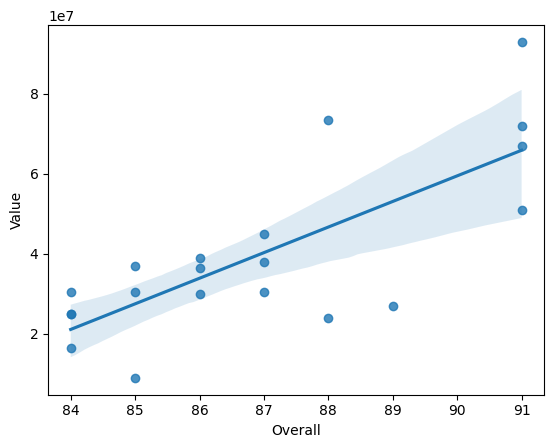

Correlation = 0.758


In [50]:
sns.regplot(x=t20.Overall,y=t20.Value) # plots a regression plot of overall score against value
plt.show()
print('Correlation =',round(t20.Overall.corr(t20.Value),3)) 
# prints correlation between overall score and value

# We can observe that there is a strong positive correlation between the overall score and value of 
# these players. The value of a player increases with the overall score of the player.
        # This kind of relationship could be because the value of a player depends on the performance
# of the player which is represented in the the overall score of the player.

**11. Generate tables containing the top 5 players by Overall rating for each unique position.**

In [51]:
for i in f.Position.unique(): 
    print(f[f.Position==i].nlargest(5,'Overall')[['Position','Name','Overall']],end='\n\n')
# prints top 5 'Position', 'Name' and 'Overall' for every unique position ranked by overall score

      Position           Name  Overall
17284       LS     G. Higuaín       88
4328        LS    Diego Costa       85
805         LS       A. Gómez       84
3764        LS  Gerard Moreno       83
240         LS  M. Arnautović       82

     Position                 Name  Overall
1489       CM  S. Milinković-Savić       85
4180       CM          I. Gündoğan       84
8210       CM             Jorginho       84
5080       CM             N. Keïta       83
8055       CM            A. Rabiot       83

      Position           Name  Overall
20448       GK         De Gea       91
16245       GK       J. Oblak       90
2056        GK      H. Lloris       88
16367       GK      G. Buffon       88
18432       GK  S. Handanovič       88

      Position           Name  Overall
5874       CAM     C. Eriksen       88
10841      CAM        M. Özil       86
14052      CAM      T. Müller       86
4675       CAM       A. Vidal       85
19850      CAM  R. Nainggolan       85

      Position            Name

1. Are there any players appearing at more than one table? Please point out such players.

In [52]:
# No, there aren't any players appearing in more than one table.

2. What is the average wage one can expect to pay for the top 5 in every position?

In [53]:
t=pd.Series(index=f.Position.unique(),dtype=float) 
# creates a Series t with indices as unique position names and datatype floating number
for i in f.Position.unique():
    t.loc[i]=f[f.Position==i].nlargest(5,'Overall').Wage.mean()
    # stores mean of wages of top 5 players by overall score for position i into t
t

LS     114200.0
CM     122800.0
GK     138200.0
CAM    168000.0
ST     259000.0
RCB    219000.0
RCM    218600.0
CB     139600.0
RB     136000.0
RM     104000.0
CDM    179400.0
LCM     93200.0
LM     131200.0
RW     163200.0
LB     175600.0
LCB    158200.0
RWB     41200.0
LW     209200.0
RS     133800.0
RDM    105000.0
LDM    105800.0
CF      42000.0
RF      38600.0
LF     123200.0
LAM     81800.0
RAM     46600.0
LWB     33800.0
dtype: float64

## Statistical Analysis

**1. Test statistically whether the Left-hand player’s overall rating is higher than the Right-hand overall score. Alpha = 0.05. Before checking the test, Kindly make sure data is normally distributed.**

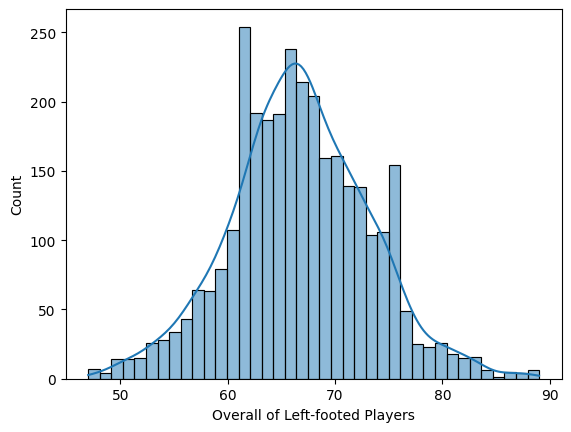

Skewness = 0.07406421142014154


In [54]:
l=f[f['Preferred Foot']=='Left'].Overall # stores overall scores of left-footed players into l
r=f[f['Preferred Foot']=='Right'].Overall # stores overall scores of right-footed players into r
sns.histplot(l,kde=True) # 'kde = True' shows Kernel Density Estimate (KDE) in the histogram
plt.xlabel('Overall of Left-footed Players')
plt.show()
print('Skewness =',l.skew())

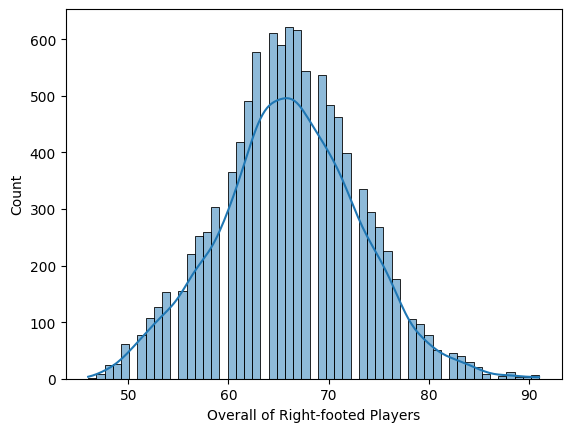

Skewness = 0.06559304671060609


In [55]:
sns.histplot(r,kde=True) # 'kde = True' shows Kernel Density Estimate (KDE) in the histogram
plt.xlabel('Overall of Right-footed Players')
plt.show()
print('Skewness =',r.skew())

# We can observe from the histograms and the skewness values that the overall ratings for both 
# left-footed and right-footed players are nearly normally distributed.

In [56]:
# H0: m1 <= m2
# H1: m1 > m2

print('P-value =',stats.ttest_ind(l,r,alternative='greater')[1])

# Since the p-value is much less than the significance level, we reject the null hypothesis. Hence,
# there is enough evidence to conclude that the overall rating of left-footed players is higher than
# that of right-footed players.

P-value = 2.718362533897758e-06


**2. Does the age factor affect the player’s potential? Check the claim that the players who are greater than 35, their potential will be lesser than those whose age is less than 35. Alpha = 0.05**

In [57]:
# H0: m1 >= m2
# H1: m1 < m2

print('P-value =',stats.ttest_ind(f[f.Age>35].Potential,f[f.Age<35].Potential,alternative='less')[1])

# Since the p-value is much less than the significance level, we reject the null hypothesis. Hence,
# there is enough evidence to conclude that the potential of players aged greater than 35 is less than
# that of players aged less than 35. 

# Thus, the age of a player does affect the player's potential.

P-value = 4.933189254994628e-14


**3. Use the statistical test to check the relationship between the Preferred Foot and Position with the 99% confident interval.**

In [58]:
# H0: 'Preferred Foot' and 'Position' are independent.
# H1: 'Preferred Foot' and 'Position' are not independent.

d=(len(f['Preferred Foot'])-1)*(len(f.Position)-1) # calculates degrees of freedom using formula
print('Test statistic =',stats.chi2_contingency(pd.crosstab(f['Preferred Foot'],f.Position))[0])
# performs Chi-square Test of Independence and returns test statistic
print('Confidence interval =',list(np.round(stats.chi2.interval(.99,d),2)))
# returns confidence interval for Chi-square distribution

# Since the test statistic does not lie within the confidence interval, we reject the null hypothesis.
# Hence, there is enough evidence to conclude that 'Preferred Foot' and 'Position' are not 
# independent. Thus, they are related to each other.

Test statistic = 3319.754844426529
Confidence interval = [180289125.96, 180386963.55]


**4. Does the International Reputation cause a significant effect on players' Wages?
Check the claim with a 0.04 significance level. Check the Normality of data before the
actual test.**

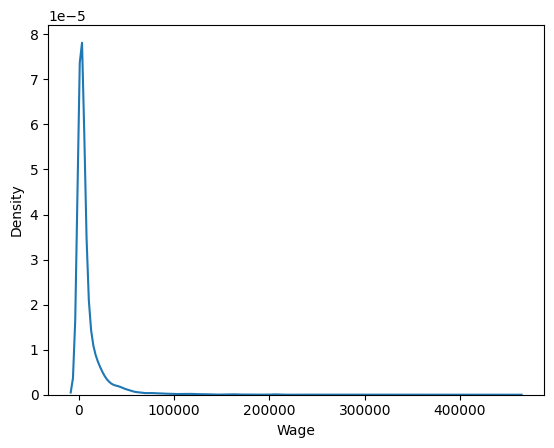

Skewness = 7.496722277411371


In [59]:
sns.kdeplot(x=f.Wage) # plots a Kernel Density Estimate (KDE) plot
plt.show()
print('Skewness =',f.Wage.skew())

# We can observe from the Kernel Density Estimate (KDE) plot and the skewness value that the 
# distribution of players' wages is highly positively skewed.

In [60]:
# H0: m1 = m2 = m3 = m4 = m5
# H1: Mean wage for atleast one international reputation level is different.

print('P-value =',stats.f_oneway(f[f['International Reputation']==1].Wage,
                                 f[f['International Reputation']==2].Wage,
                                 f[f['International Reputation']==3].Wage,
                                 f[f['International Reputation']==4].Wage,
                                 f[f['International Reputation']==5].Wage)[1])
# performs One-way ANOVA and returns p-value

# Since the p-value is less than the significance level, we reject the null hypothesis. Hence, there
# is enough evidence to conclude that the mean wage for atleast one international reputation level is
# different.

# Thus, international reputation of a player causes a significant effect on players' wages.

P-value = 0.0


**5. Check the claim that the median wages of under top 20 players are lesser than or equal
to 25000. Test the claim with a 0.05 % significance level. Check the data is normally
distributed or not before the testing the claim statistically.**

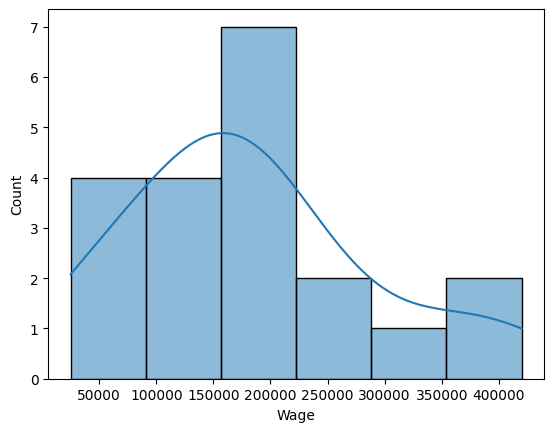

Skewness = 0.7378765548916051


In [61]:
sns.histplot(t20.Wage,kde=True) # 'kde = True' shows Kernel Density Estimate (KDE) in the histogram
plt.show()
print('Skewness =',t20.Wage.skew())

# We can observe from the histogram and the skewness value that the distribution of the top 20
# players' wages is moderately positively skewed.

In [62]:
# H0: median <= 25000
# H1: median > 25000

print('P-value =',stats.wilcoxon(t20.Wage-25000,alternative='greater',method='approx')[1])
# performs Wilcoxon Signed-rank Test and returns p-value
# passing the difference of wages from 25000
# "method = 'approx'" approximates to calculate p-value

# Since the p-value is less than the significance level, we reject the null hypothesis. Hence, there
# is enough evidence to conclude that the median wage of the top 20 players is more than 25000.

P-value = 6.571022226946025e-05
